In [4]:
import pandas as pd
import numpy as np

val_data = pd.read_csv('output/val_prediction/val_model17093_p4.csv')

val_data.head()

,Store,Date,PredictSales,Sales
0,1,2015-07-31,5050.1990,5263
1,2,2015-07-31,5609.7334,6064
2,3,2015-07-31,8616.7780,8314
3,4,2015-07-31,11493.2010,13995
4,5,2015-07-31,5320.2470,4822


In [5]:
def ToWeight(y):
    w = np.zeros(y.shape, dtype=float)
    ind = y != 0
    w[ind] = 1./(y[ind]**2)
    return w

def rmspe(yhat, y):
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean( w * (y - yhat)**2 ))
    return rmspe

In [7]:
val_data['rmspe'] = val_data[['PredictSales', 'Sales']].apply(lambda x: rmspe(x[0], x[1]), axis=1)

val_data.head()

,Store,Date,PredictSales,Sales,rmspe
0,1,2015-07-31,5050.1990,5263,0.040433
1,2,2015-07-31,5609.7334,6064,0.074912
2,3,2015-07-31,8616.7780,8314,0.036418
3,4,2015-07-31,11493.2010,13995,0.178764
4,5,2015-07-31,5320.2470,4822,0.103328


In [8]:
import seaborn as sns

%matplotlib inline


In [12]:
val_eval_store = val_data.groupby('Store')['rmspe'].agg(['mean','std']).reset_index()

val_eval_store.head()

,Store,mean,std
0,1,0.070130,0.055143
1,2,0.074613,0.073550
2,3,0.071321,0.064207
3,4,0.078778,0.053742
4,5,0.081008,0.052143


[Text(0,0.5,'rmspe(mean/std)'), Text(0.5,0,'Store')]

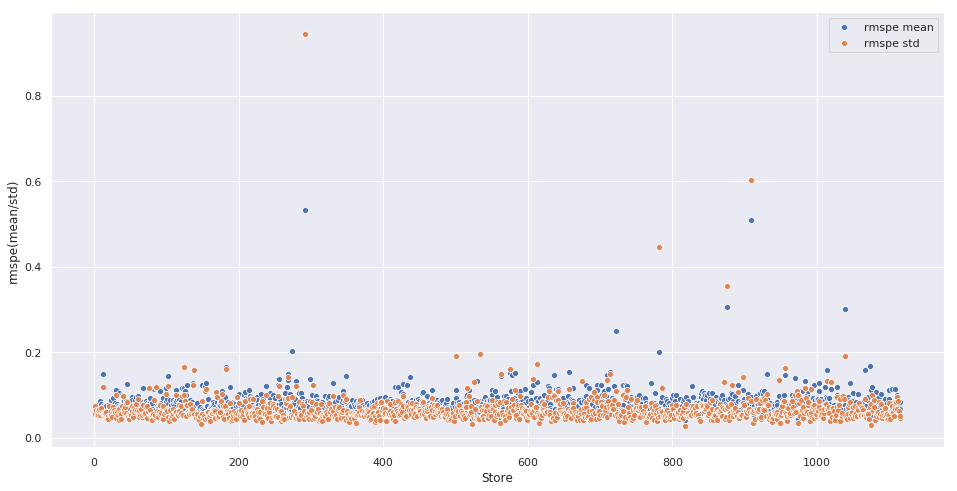

In [22]:
sns.set(rc={'figure.figsize':(16,8)})


ax = sns.scatterplot(x='Store', y='mean', data = val_eval_store, label = 'rmspe mean')
ax = sns.scatterplot(x='Store', y='std', data = val_eval_store, ax=ax, label = 'rmspe std')

ax.set(xlabel='Store', ylabel='rmspe(mean/std)')


In [23]:
val_eval_date = val_data.groupby('Date')['rmspe'].agg(['mean','std']).reset_index()

val_eval_date.head()

,Date,mean,std
0,2015-06-18,0.069721,0.064739
1,2015-06-19,0.107579,0.078271
2,2015-06-20,0.088694,0.079323
3,2015-06-21,0.069232,0.051436
4,2015-06-22,0.084871,0.075913


In [28]:
val_eval_date['Date'] = pd.to_datetime(val_eval_date['Date'])
val_eval_date['Date_m'] = val_eval_date['Date'].dt.strftime('%m/%d')

val_eval_date.head()

,Date,mean,std,Date_m
0,2015-06-18,0.069721,0.064739,06/18
1,2015-06-19,0.107579,0.078271,06/19
2,2015-06-20,0.088694,0.079323,06/20
3,2015-06-21,0.069232,0.051436,06/21
4,2015-06-22,0.084871,0.075913,06/22


[Text(0,0.5,'rmspe(mean/std)'), Text(0.5,0,'Date')]

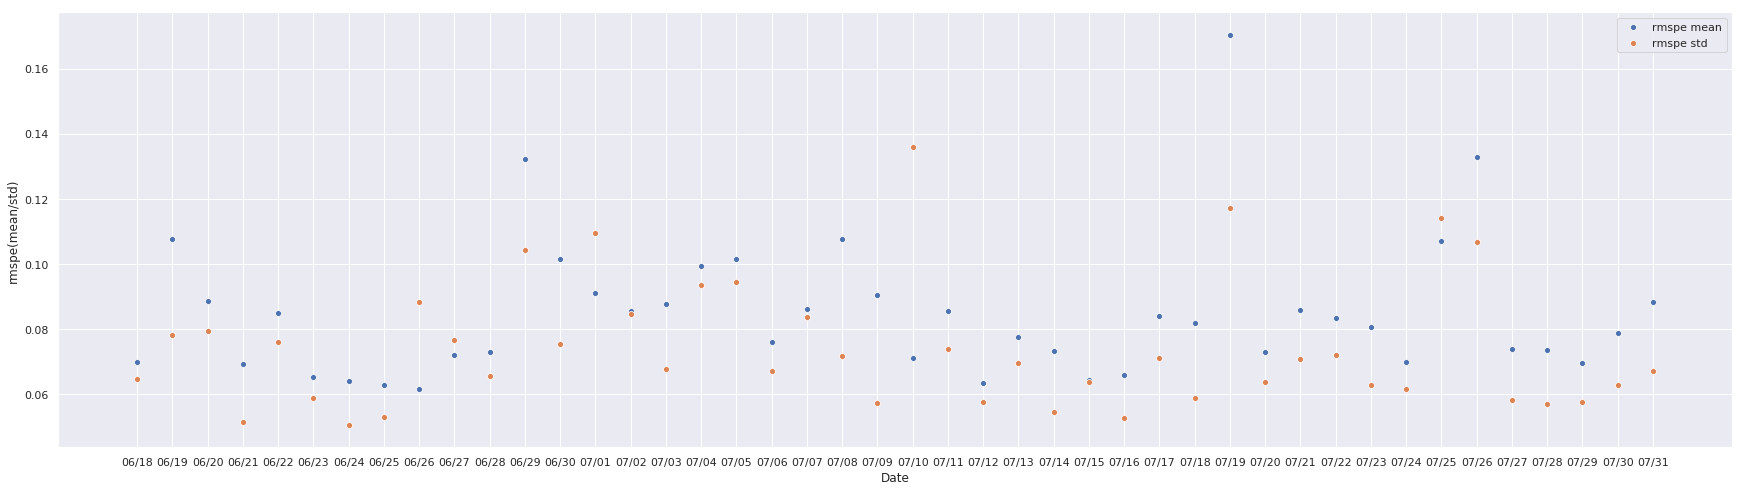

In [31]:
sns.set(rc={'figure.figsize':(30,8)})

ax2 = sns.scatterplot(x='Date_m', y='mean', data = val_eval_date, label = 'rmspe mean')
ax2 = sns.scatterplot(x='Date_m', y='std', data = val_eval_date, ax=ax2, label = 'rmspe std')

ax2.set(xlabel='Date', ylabel='rmspe(mean/std)')
